# Computer Vision Project of Superhero Classification

In [1]:
!apt-get update
!apt-get install ffmpeg libsm6 libxext6  -y

Hit:1 http://deb.debian.org/debian buster InRelease
Hit:2 http://deb.debian.org/debian-security buster/updates InRelease
Hit:3 http://deb.debian.org/debian buster-updates InRelease




libsm6 is already the newest version (2:1.2.3-1).
libxext6 is already the newest version (2:1.3.3-1+b2).
ffmpeg is already the newest version (7:4.1.10-0+deb10u1).
0 upgraded, 0 newly installed, 0 to remove and 55 not upgraded.


In [2]:
!pip install opencv-python==4.6.0.66

You should consider upgrading via the '/root/venv/bin/python -m pip install --upgrade pip' command.


In [3]:
import os
import cv2
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
import random
import pandas as pd

2022-12-20 00:13:04.255494: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-12-20 00:13:04.396351: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /root/venv/lib/python3.9/site-packages/cv2/../../lib64:
2022-12-20 00:13:04.396387: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.
2022-12-20 00:13:04.433270: E tensorflow/stream_executor/cuda/cuda_blas.cc:2981] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already be

# Images

In [4]:
!ls

Blackwidow  Fake  Hulk	Ironman  Spiderman


In [5]:
directorio = r'/work/'
#Nombres = ["Blackpanter","Blackwidow","Hulk","Ironman","Spiderman","Thor"]
Nombres = ["Blackwidow","Hulk","Ironman","Spiderman"]

In [6]:
len(Nombres)

4

In [82]:
data=[]
talla=100
for Nombre in Nombres:
        labelN=Nombres.index(Nombre)
        carpeta=os.path.join(directorio,Nombre)
        for imagen in os.listdir(carpeta):
            imagen_path=os.path.join(carpeta, imagen)
            imagen_path=os.path.join(carpeta, imagen)
            imagen_array=cv2.imread(imagen_path,cv2.IMREAD_GRAYSCALE)
            imgBGR=cv2.imread(imagen_path)
            #imgRGB = cv2.cvtColor(imgBGR, cv2.COLOR_BGR2RGB)
            imagen_array = imgBGR
            #imagen_array=cv2.imread(imagen_path,cv2.IMREAD_GRAYSCALE)
            try:
                imagen_array=cv2.resize(imagen_array,(talla,talla))
                data.append([imagen_array,labelN])
            except Exception as e:
                print(str(e))

OpenCV(4.6.0) /io/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

OpenCV(4.6.0) /io/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

OpenCV(4.6.0) /io/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

OpenCV(4.6.0) /io/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

OpenCV(4.6.0) /io/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

OpenCV(4.6.0) /io/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

OpenCV(4.6.0) /io/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

OpenCV(4.6.0) /io/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion faile

In [63]:
df = pd.DataFrame(data)


In [64]:
freq = df.groupby([1]).count() 
print(freq)

     0
1     
0  383
1  342
2  378
3  328


In [10]:
Nombres

['Blackwidow', 'Hulk', 'Ironman', 'Spiderman']

In [11]:
df.head()

0  1
0  [[249, 251, 236, 239, 241, 251, 251, 238, 237,...  0
1  [[153, 153, 153, 154, 156, 155, 155, 155, 155,...  0
2  [[184, 180, 183, 183, 182, 183, 182, 180, 182,...  0
3  [[16, 19, 16, 23, 21, 27, 37, 49, 55, 49, 31, ...  0
4  [[45, 44, 62, 60, 54, 56, 49, 53, 58, 53, 48, ...  0

In [83]:
random.shuffle(data)

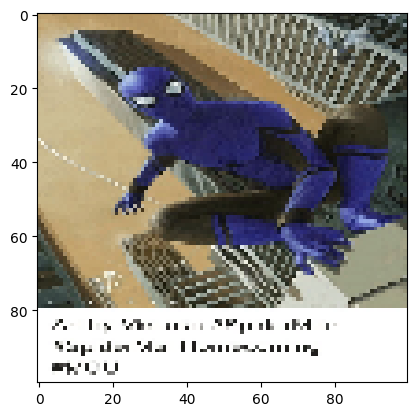

3


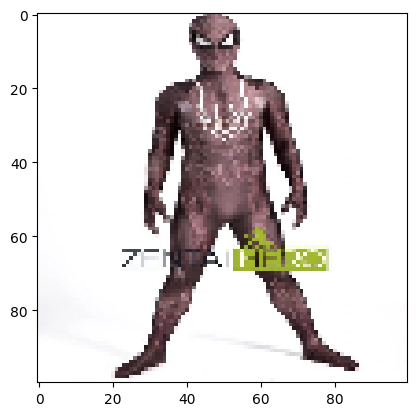

3


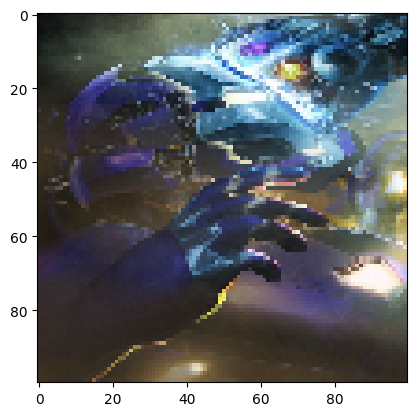

2


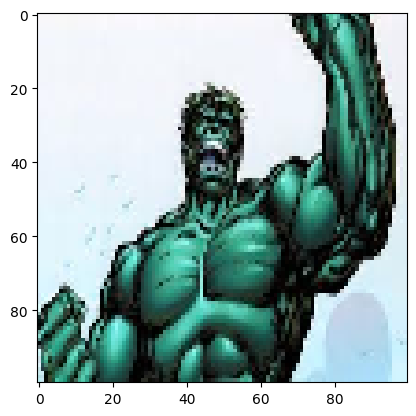

1


In [84]:
for i in range(4):
    plt.imshow(data[(i*300)][0])
    plt.show()
    print(data[(i*300)][1])

In [14]:
Nombres[3]

'Spiderman'

# Dividing into testing and training

In [85]:
data_train= data[:int(len(data)*(0.7))]
data_test= data[int(len(data)*(0.7)):]

In [86]:
X_train=[]
Y_train=[]
for imagenes, labels in data_train:
    X_train.append(imagenes)
    Y_train.append(labels)
X_train=np.array(X_train)
Y_train=np.array(Y_train)
X_train=tf.keras.utils.normalize(X_train,axis=1) # Normalizado

In [87]:
X_test=[]
Y_test=[]
for imagenes, labels in data_test:
    X_test.append(imagenes)
    Y_test.append(labels)
X_test=np.array(X_test)
Y_test=np.array(Y_test)
X_test=tf.keras.utils.normalize(X_test,axis=1) # Normalizado

# Model

## Model 1

In [88]:
X_train=X_train.reshape(-1,100,100,3)
X_test=X_test.reshape(-1,100,100,3)

In [89]:
modelo1 = tf.keras.models.Sequential()

# Add the existing layers to the model
modelo1.add(tf.keras.layers.Conv2D(100, (5,5), activation='relu'))
modelo1.add(tf.keras.layers.MaxPooling2D((3,3), strides=2))

modelo1.add(tf.keras.layers.Flatten())
modelo1.add(tf.keras.layers.Dense(128, activation='relu', input_shape=(talla, talla)))
modelo1.add(tf.keras.layers.Dense(64, activation='relu'))

# Change the activation function of the output layer
modelo1.add(tf.keras.layers.Dense(4, activation='sigmoid'))

# Compile the model with the same optimizer and loss function as before

modelo1.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics='accuracy')

In [80]:
modelo1.fit(X_train,Y_train,epochs=5)

Epoch 1/5


KernelInterrupted: Execution interrupted by the Jupyter kernel.

In [50]:
modelo1.evaluate(X_test,Y_test)

14/14 [==============================] - 4s 317ms/step - loss: 1.0796 - accuracy: 0.6576


[1.0795668363571167, 0.6575963497161865]

## Modelo 3

In [27]:
modelo3=tf.keras.models.Sequential()
modelo3.add(tf.keras.layers.Conv2D(100,(10,10),activation='relu'))
modelo3.add(tf.keras.layers.MaxPooling2D((1,1),strides=2))
modelo3.add(tf.keras.layers.Flatten())
modelo3.add(tf.keras.layers.Dense(128,activation='relu', input_shape=(talla,talla)))
modelo3.add(tf.keras.layers.Dense(9,activation='softmax'))
modelo3.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics='accuracy')

In [52]:
modelo3.fit(X_train,Y_train,epochs=1)

33/33 [==============================] - 49s 1s/step - loss: 0.3791 - accuracy: 0.8939


In [53]:
modelo3.evaluate(X_test,Y_test)

14/14 [==============================] - 6s 393ms/step - loss: 1.1351 - accuracy: 0.6213


[1.1350972652435303, 0.6213151812553406]

## Modelo 4

In [30]:
modelo4= tf.keras.models.Sequential()

# Add the existing layers to the model
modelo4.add(tf.keras.layers.Conv2D(100, (5,5), activation='relu'))
modelo4.add(tf.keras.layers.MaxPooling2D((3,3), strides=2))

modelo4.add(tf.keras.layers.Flatten())
modelo4.add(tf.keras.layers.Dense(128, activation='relu', input_shape=(talla, talla)))

# Add a new dense layer
modelo4.add(tf.keras.layers.Dense(64, activation='relu'))

# Use L2 weight decay regularization in the dense layers
modelo4.add(tf.keras.layers.Dense(4, activation='sigmoid', kernel_regularizer=tf.keras.regularizers.l2(0.001)))

# Compile the model with the same loss function as before
modelo4.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics='accuracy')

In [31]:
modelo4.fit(X_train,Y_train,epochs=5)

Epoch 1/5
33/33 [==============================] - 49s 1s/step - loss: 1.4125 - accuracy: 0.2960
Epoch 2/5
33/33 [==============================] - 48s 1s/step - loss: 1.2265 - accuracy: 0.4479
Epoch 3/5
33/33 [==============================] - 48s 1s/step - loss: 0.8946 - accuracy: 0.6767
Epoch 4/5
33/33 [==============================] - 48s 1s/step - loss: 0.5727 - accuracy: 0.8315
Epoch 5/5
33/33 [==============================] - 48s 1s/step - loss: 0.2644 - accuracy: 0.9260


In [32]:
modelo4.evaluate(X_test,Y_test)

14/14 [==============================] - 5s 316ms/step - loss: 1.3014 - accuracy: 0.6327


[1.3013672828674316, 0.6326530575752258]

## Modelo 6

In [33]:
modelo6 = tf.keras.models.Sequential()

# Add the existing layers to the model
modelo6.add(tf.keras.layers.Conv2D(100, (5,5), activation='relu'))
modelo6.add(tf.keras.layers.MaxPooling2D((3,3), strides=2))

modelo6.add(tf.keras.layers.Flatten())
modelo6.add(tf.keras.layers.Dense(128, activation='relu', input_shape=(talla, talla)))

# Add a new dense layer
modelo6.add(tf.keras.layers.Dense(64, activation='relu'))

# Use dropout regularization in the dense layers
modelo6.add(tf.keras.layers.Dropout(0.5))

modelo6.add(tf.keras.layers.Dense(4, activation='sigmoid'))
modelo6.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics='accuracy')

In [43]:
modelo6.fit(X_train,Y_train,epochs=1)

33/33 [==============================] - 48s 1s/step - loss: 0.2642 - accuracy: 0.9270


In [44]:
modelo6.evaluate(X_test,Y_test)

14/14 [==============================] - 4s 322ms/step - loss: 1.2165 - accuracy: 0.6508


[1.2165173292160034, 0.6507936716079712]

# Probando

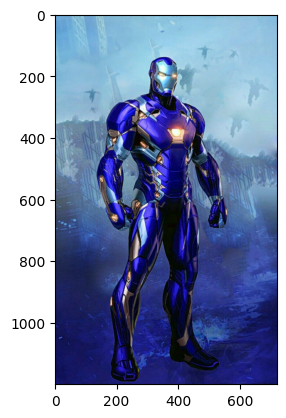

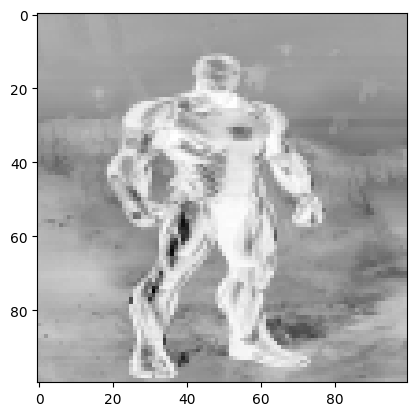

1/1 [==============================] - 0s 60ms/step


'Ironman'

In [45]:
imagen=cv2.imread('/work/Ironman/Iron Man (1).jpg')
plt.imshow(imagen)
plt.show()
imagen=cv2.cvtColor(imagen, cv2.COLOR_BGR2GRAY)
imagen=cv2.resize(imagen,(talla,talla),interpolation=cv2.INTER_AREA)
imagen=tf.keras.utils.normalize(imagen,axis=1)
plt.imshow(imagen, cmap=plt.cm.binary)
plt.show()
imagen=imagen.reshape(-1,talla,talla,1)
Nombres[int(np.argmax(modelo4.predict(imagen)))]

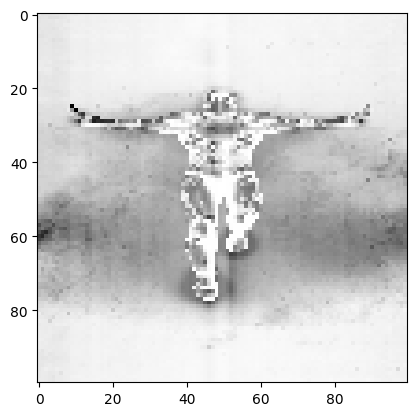

1/1 [==============================] - 0s 84ms/step
Ironman


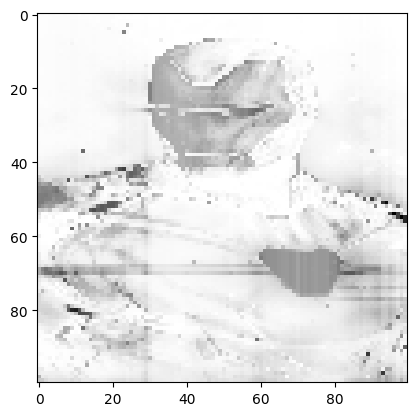

1/1 [==============================] - 0s 47ms/step
Ironman


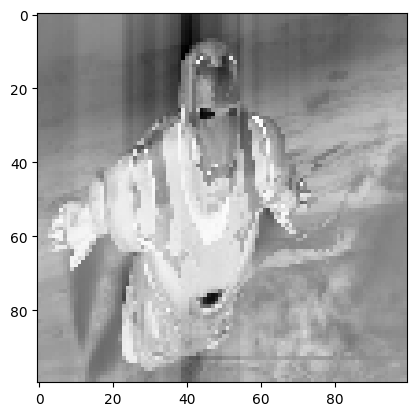

1/1 [==============================] - 0s 36ms/step
Hulk


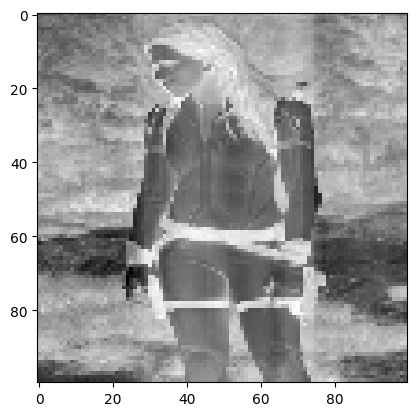

1/1 [==============================] - 0s 65ms/step
Hulk


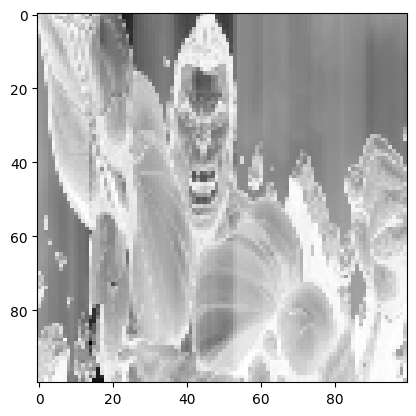

1/1 [==============================] - 0s 36ms/step
Hulk


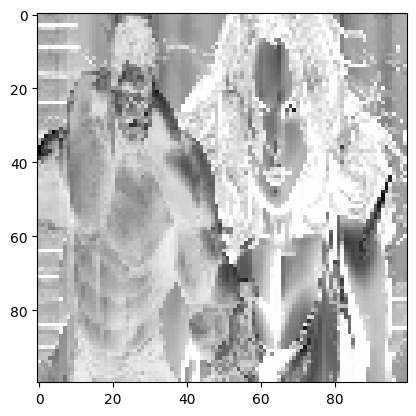

1/1 [==============================] - 0s 69ms/step
Hulk


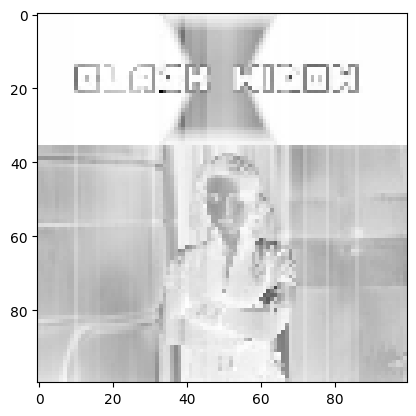

1/1 [==============================] - 0s 31ms/step
Blackwidow


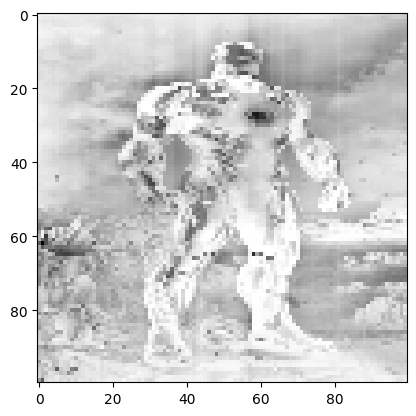

1/1 [==============================] - 0s 45ms/step
Blackwidow


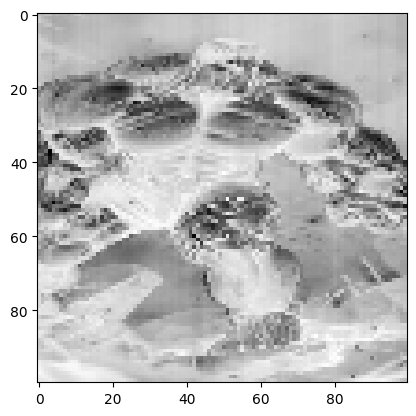

1/1 [==============================] - 0s 57ms/step
Hulk


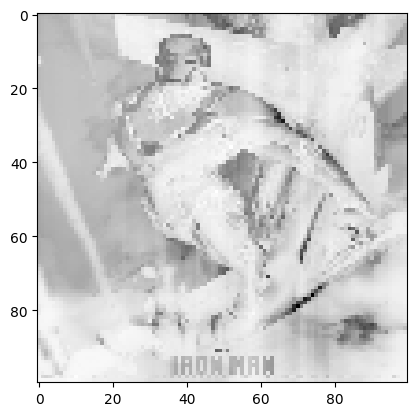

1/1 [==============================] - 0s 42ms/step
Ironman


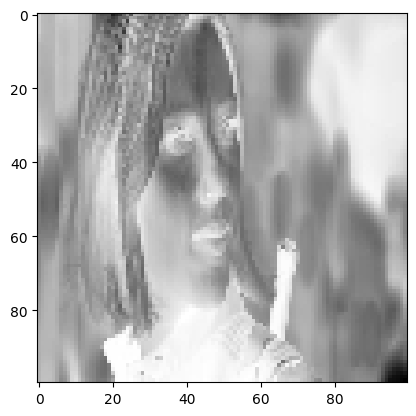

1/1 [==============================] - 0s 43ms/step
Blackwidow


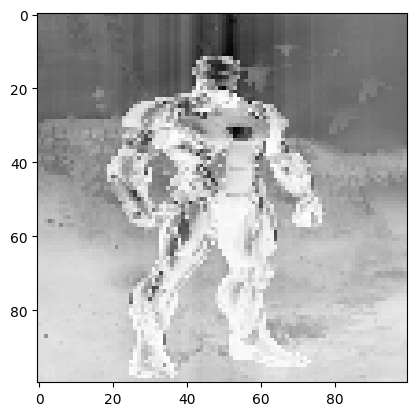

1/1 [==============================] - 0s 39ms/step
Ironman


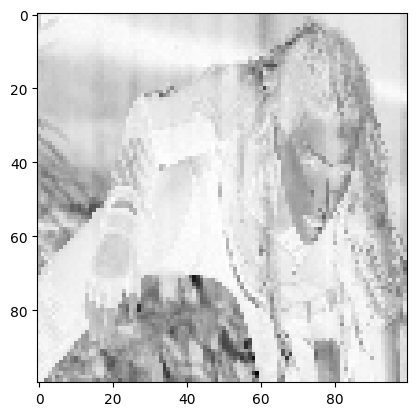

1/1 [==============================] - 0s 42ms/step
Blackwidow


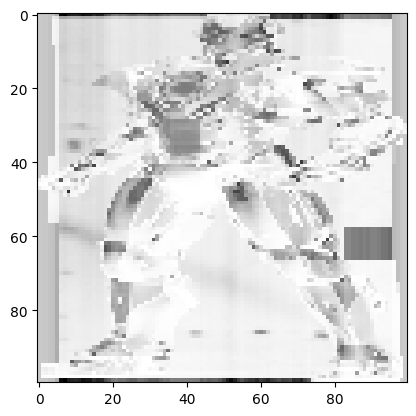

1/1 [==============================] - 0s 67ms/step
Ironman


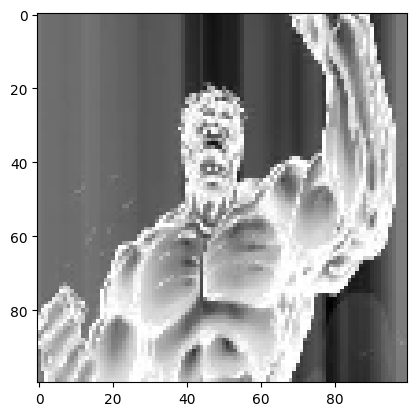

1/1 [==============================] - 0s 39ms/step
Hulk


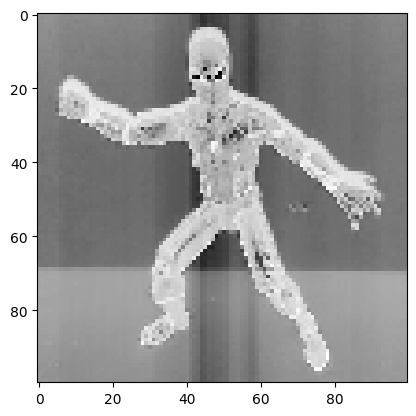

1/1 [==============================] - 0s 45ms/step
Spiderman


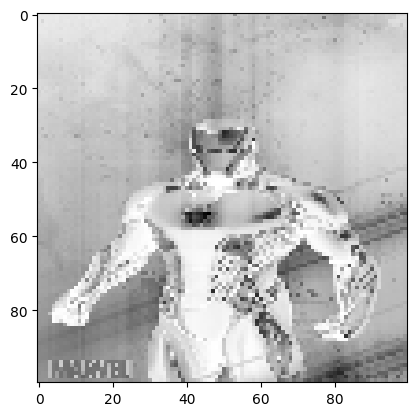

1/1 [==============================] - 0s 34ms/step
Spiderman


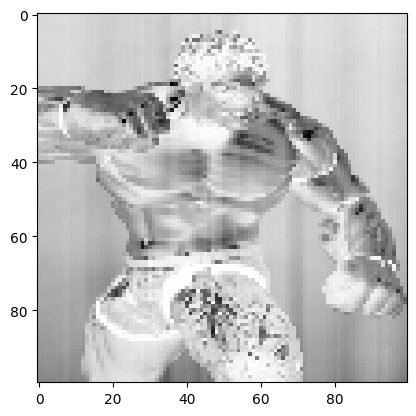

1/1 [==============================] - 0s 49ms/step
Hulk


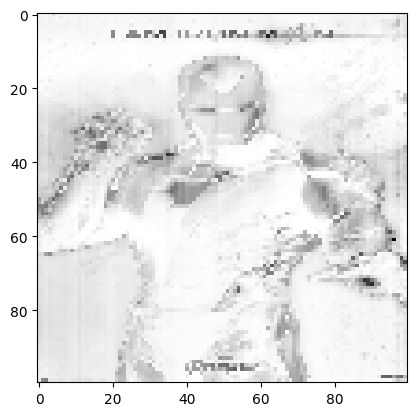

1/1 [==============================] - 0s 36ms/step
Ironman


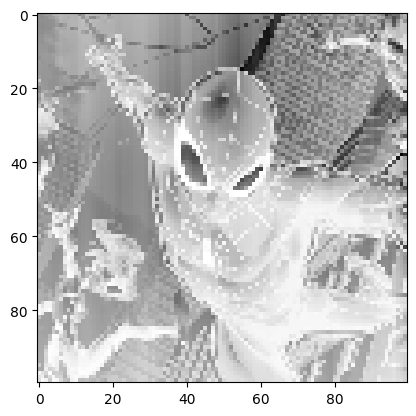

1/1 [==============================] - 0s 36ms/step
Spiderman


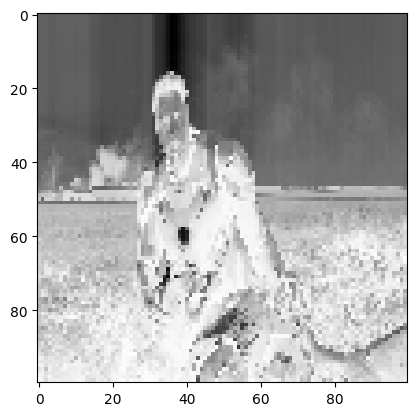

1/1 [==============================] - 0s 33ms/step
Blackwidow


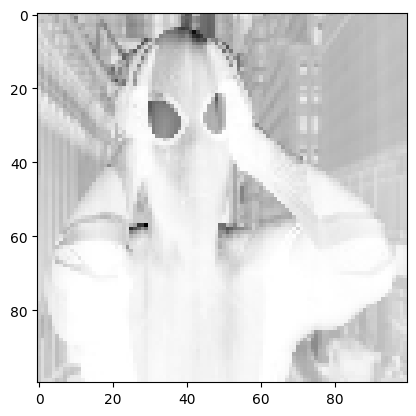

1/1 [==============================] - 0s 34ms/step
Spiderman


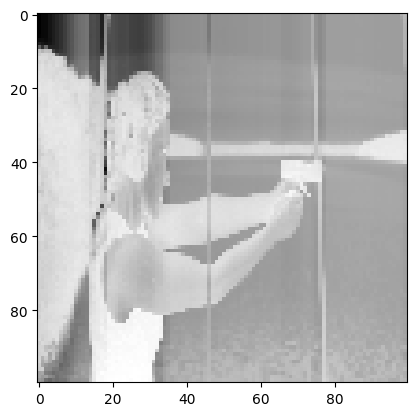

1/1 [==============================] - 0s 41ms/step
Ironman


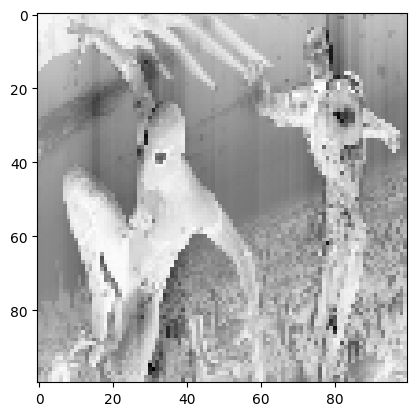

1/1 [==============================] - 0s 71ms/step
Blackwidow


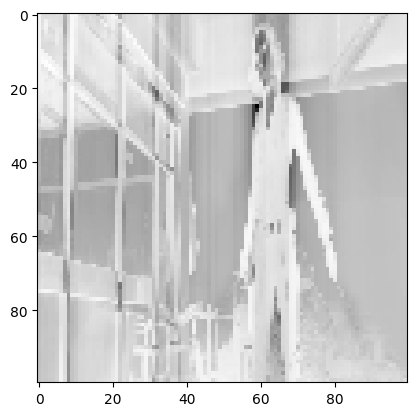

1/1 [==============================] - 0s 44ms/step
Spiderman


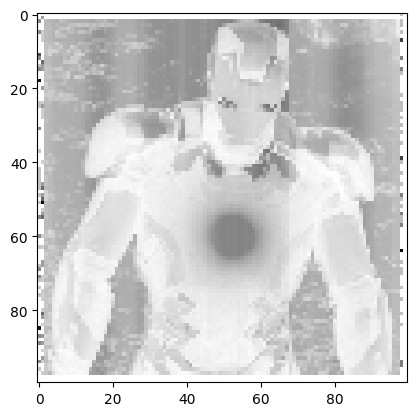

1/1 [==============================] - 0s 38ms/step
Spiderman


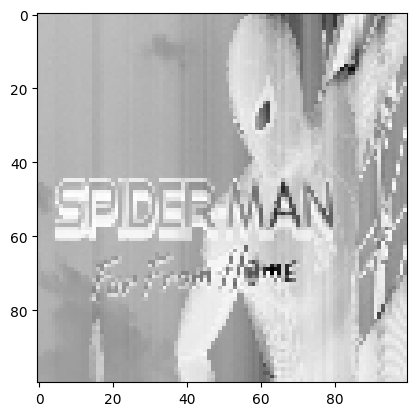

1/1 [==============================] - 0s 31ms/step
Spiderman


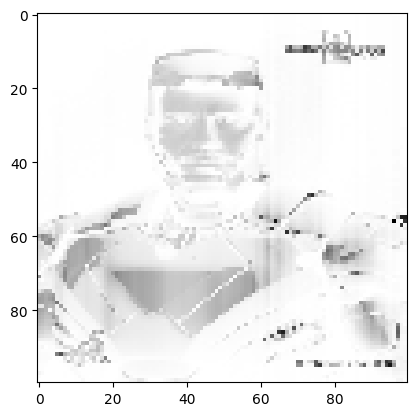

1/1 [==============================] - 0s 35ms/step
Ironman


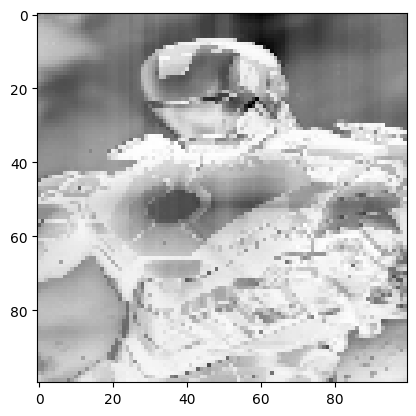

1/1 [==============================] - 0s 41ms/step
Ironman


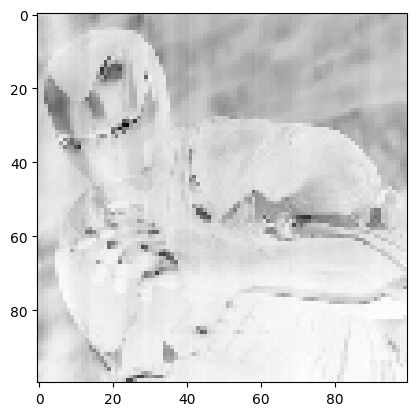

1/1 [==============================] - 0s 39ms/step
Spiderman


In [56]:
for i in range(3*10):
    imagen = X_test[i+1]
    
    plt.imshow(imagen,cmap=plt.cm.binary)
    plt.show()
    imagen=imagen.reshape(-1,talla,talla,1)
    print(Nombres[int(np.argmax(modelo1.predict(imagen)))])
    

# Detectando fakes

In [47]:
datafake=[]
talla=100
carpeta=os.path.join(directorio,'Fake')
for imagen in os.listdir(carpeta):
    imagen_path=os.path.join(carpeta, imagen)
    imagen_array=cv2.imread(imagen_path,cv2.IMREAD_GRAYSCALE)
    imgBGR=cv2.imread(imagen_path)
    imgRGB = cv2.cvtColor(imgBGR, cv2.COLOR_BGR2RGB)
    try:
        imagen_array=cv2.resize(imagen_array,(talla,talla))
        datafake.append([imagen_array,imgRGB])
    except Exception as e:
        print(str(e))

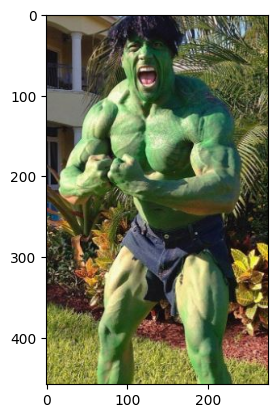

1/1 [==============================] - 0s 46ms/step
Hulk


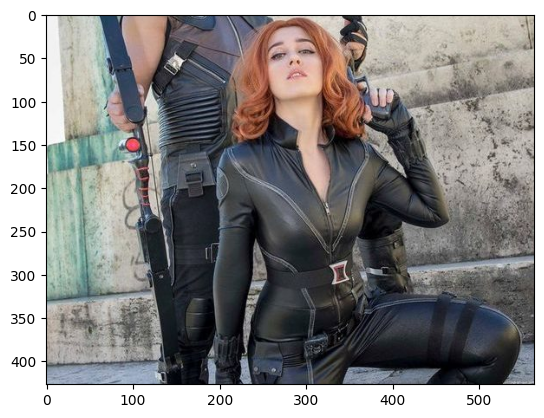

1/1 [==============================] - 0s 33ms/step
Blackwidow


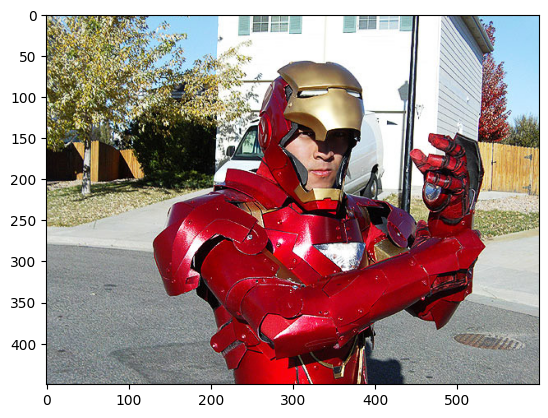

1/1 [==============================] - 0s 32ms/step
Ironman


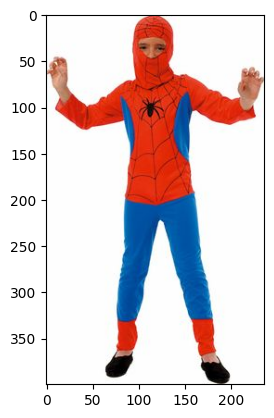

1/1 [==============================] - 0s 34ms/step
Spiderman


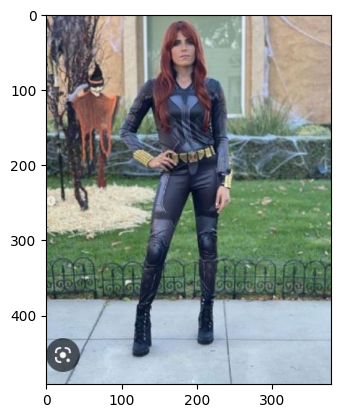

1/1 [==============================] - 0s 30ms/step
Spiderman


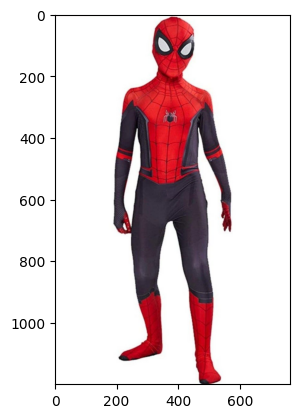

1/1 [==============================] - 0s 43ms/step
Spiderman


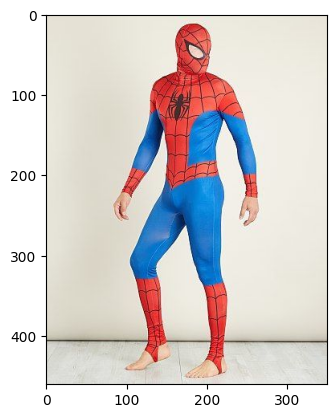

1/1 [==============================] - 0s 37ms/step
Spiderman


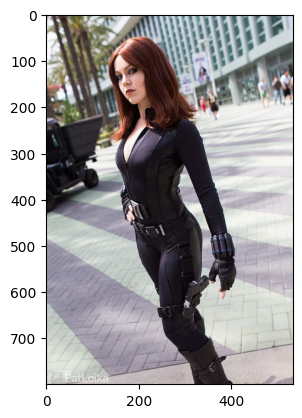

1/1 [==============================] - 0s 45ms/step
Blackwidow


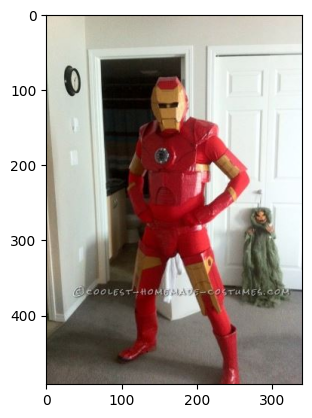

1/1 [==============================] - 0s 43ms/step
Spiderman


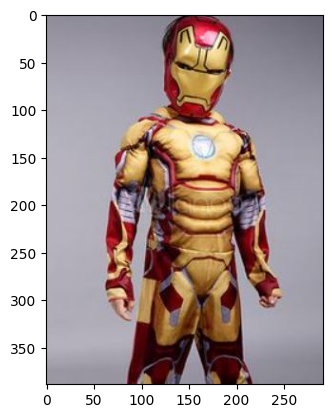

1/1 [==============================] - 0s 33ms/step
Blackwidow


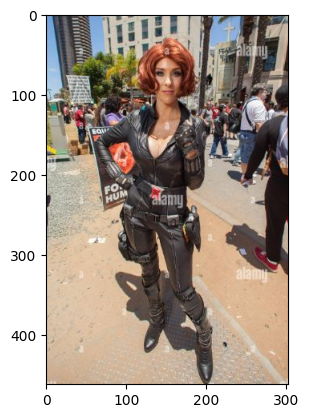

1/1 [==============================] - 0s 47ms/step
Spiderman


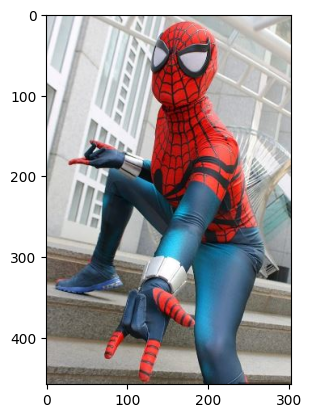

1/1 [==============================] - 0s 35ms/step
Spiderman


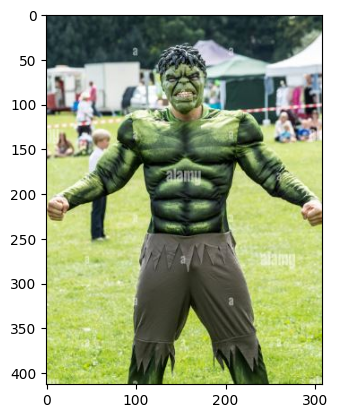

1/1 [==============================] - 0s 56ms/step
Ironman


In [57]:
for i in range(len(datafake)):
    plt.imshow(datafake[i][1])
    plt.show()
    imagen=datafake[i][0]
    imagen=cv2.resize(imagen,(talla,talla),interpolation=cv2.INTER_AREA)
    imagen=tf.keras.utils.normalize(imagen,axis=1)
    imagen=imagen.reshape(-1,talla,talla,1)
    print(Nombres[int(np.argmax(modelo1.predict(imagen)))])


In [40]:
freq = df.groupby([1]).count() 
print(freq)

     0
1     
0  383
1  342
2  391
3  352


<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=21cbae3b-8adf-44bd-83c2-330e60224de6' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>